# Analyse Images Summary Table

The images summary table was created by scanning over all images in the MURA dataset, and recording various pieces of info - e.g. train/validation, x-ray site, patient ID etc. Here we crunch this table to get a better understanding of the dataset, and compare to the stats about MURA published by its curators. 

### Imports

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image

/home/harrisoneighty7_gmail_com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/harrisoneighty7_gmail_com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/harrisoneighty7_gmail_com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
print("Pandas Version:",pd.__version__)
print("MatPlotLib Version:",matplotlib.__version__)
print("Seaborn Version:", sns.__version__)

Pandas Version: 0.23.3
MatPlotLib Version: 2.2.2
Seaborn Version: 0.8.1


In [3]:
%matplotlib inline

## MURA - Published Stats

Taken from the description of the MURA dataset here (as-of 7th July 2018):

https://stanfordmlgroup.github.io/competitions/mura/

In [4]:
num_studies_published = 14863
num_patients_published = 12173
num_images_published  = 40561

## Images Summary

In [5]:
images_summary = pd.read_csv("images_summary.csv")

Display one example image

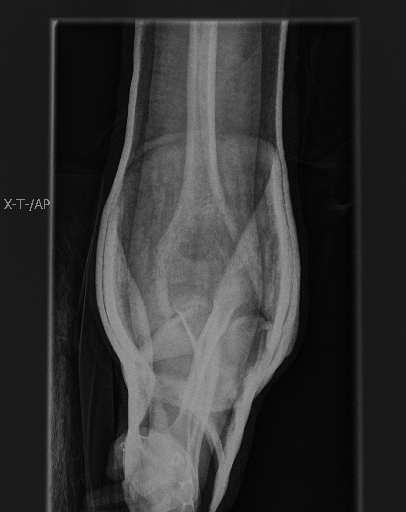

In [6]:
img_path = images_summary.FileName[0]
Image(img_path)

In [7]:
from IPython.display import Image

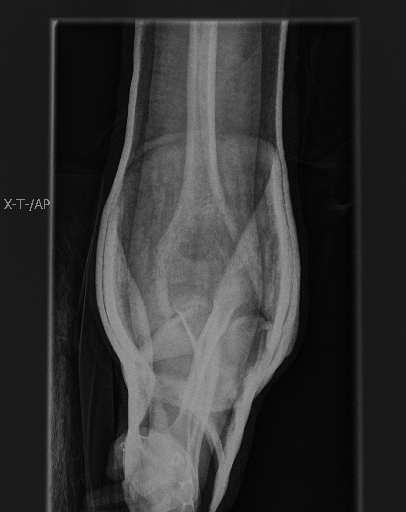

In [8]:
Image(img_path)

### Number of Images

In [9]:
num_images = images_summary.shape[0]
print("Number of Images: ", num_images)

Number of Images:  40005


Number of images here is below that stated on the MURA website. Most likely due to the test set being witheld.

In [10]:
images_summary.head()

,Unnamed: 0,DataRole,Site,PatientID,StudyNumber,StudyOutcome,ImageNumber,ImageWidth,ImageHeight,FileName,FileName_Relative
0,0,valid,XR_ELBOW,patient11236,study1,1,image2,406,512,/home/harrisoneighty7_gmail_com/MURA/data/raw/...,MURA-v1.1/valid/XR_ELBOW/patient11236/study1_p...
1,1,valid,XR_ELBOW,patient11236,study1,1,image3,424,512,/home/harrisoneighty7_gmail_com/MURA/data/raw/...,MURA-v1.1/valid/XR_ELBOW/patient11236/study1_p...
2,2,valid,XR_ELBOW,patient11236,study1,1,image1,512,424,/home/harrisoneighty7_gmail_com/MURA/data/raw/...,MURA-v1.1/valid/XR_ELBOW/patient11236/study1_p...
3,3,valid,XR_ELBOW,patient11342,study1,1,image2,512,407,/home/harrisoneighty7_gmail_com/MURA/data/raw/...,MURA-v1.1/valid/XR_ELBOW/patient11342/study1_p...
4,4,valid,XR_ELBOW,patient11342,study1,1,image1,407,512,/home/harrisoneighty7_gmail_com/MURA/data/raw/...,MURA-v1.1/valid/XR_ELBOW/patient11342/study1_p...


In [11]:
images_summary.groupby("DataRole").size()

DataRole
train    36808
valid     3197
dtype: int64

In [12]:
images_by_site = images_summary.groupby(["DataRole","Site"], as_index=False).count()[["DataRole","Site","PatientID"]]

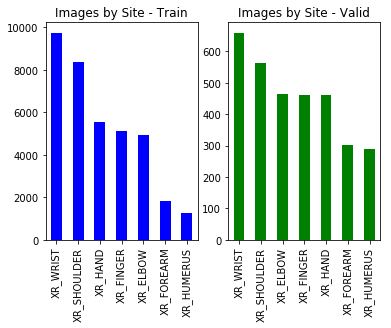

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.value_counts(images_summary[images_summary.DataRole == "train"].Site).plot(kind="bar", ax=axes[0], title="Images by Site - Train", color="blue")
pd.value_counts(images_summary[images_summary.DataRole == "valid"].Site).plot(kind="bar", ax=axes[1], title="Images by Site - Valid", color="green")

### Number of Patients

In [14]:
patients = images_summary.groupby("PatientID", as_index=False).count()

In [15]:
patients.head()

,PatientID,Unnamed: 0,DataRole,Site,StudyNumber,StudyOutcome,ImageNumber,ImageWidth,ImageHeight,FileName,FileName_Relative
0,patient00001,3,3,3,3,3,3,3,3,3,3
1,patient00002,3,3,3,3,3,3,3,3,3,3
2,patient00003,3,3,3,3,3,3,3,3,3,3
3,patient00004,4,4,4,4,4,4,4,4,4,4
4,patient00005,1,1,1,1,1,1,1,1,1,1


In [16]:
num_patients = patients.shape[0]
print("Number of Patients: ", num_patients)

Number of Patients:  11967


In [17]:
patients_role = images_summary.groupby(["DataRole","PatientID"], as_index=False).count()

In [18]:
patients_role.shape[0]

11967

The size of the patients & patients_role dataframe are equal - implying there are no PatientID's appearing in both training and validation sets, which is good. (E.g. could have seen different studies for the same patient split across train/valid, but this is not the case).

In [19]:
patients_site = images_summary.groupby(["Site","PatientID"], as_index=False).count()

In [20]:
num_patients_site = patients_site.shape[0]
num_patients_site

14052

In [21]:
num_patients_site - num_patients

2085

The patients_site dataframe has more records than patients, so there are patients who have had x-rays on multiple sites.

In [22]:
patients_multiple_sites = patients_site.groupby("PatientID", as_index=False).count()
patients_multiple_sites = patients_multiple_sites[patients_multiple_sites.Site > 1]
patients_multiple_sites.Site.sum() - patients_multiple_sites.shape[0], patients_multiple_sites.Site.sum(), patients_multiple_sites.shape[0]

(2085, 3800, 1715)

There are 1715 patients (out of ~12,000 total) which have x-rays for mutliple sites.

In [23]:
images_summary_multiple_sites = images_summary[images_summary.PatientID.isin(patients_multiple_sites.PatientID)]
images_summary_multiple_sites.PatientID.nunique()

1715

Now we have the per-image details for the multiple-site patients. The number of unique patient ID's matches that above, so we're looking at the correct set of patients.

In [24]:
images_summary_multiple_sites.size, images_summary_multiple_sites.size/images_summary.size

(122529, 0.27844019497562805)

These mutliple-site patients comprise ~30% of all the images in the dataset, despite only being ~10% of patients.

Now calculate the distribution of numbers of sites:

In [25]:
patients_multiple_sites.groupby("Site").size()

Site
2    1405
3     257
4      46
5       7
dtype: int64

So 7 patients have studies on 5 different sites.

In [26]:
patients_outcomes = images_summary.groupby(["PatientID","StudyOutcome"], as_index=False).count()
patients_multiple_outcomes = patients_outcomes.groupby("PatientID", as_index=False).count()
patients_multiple_outcomes = patients_multiple_outcomes[patients_multiple_outcomes.Site > 1]
num_patients_multiple_outcomes = patients_multiple_outcomes.shape[0]
num_patients_multiple_outcomes

1055

### Number of Studies

In [27]:
studies = images_summary.groupby(["PatientID", "StudyNumber"]).size()

In [28]:
num_studies = studies.count()
print("Number of Studies: ", num_studies)

Number of Studies:  12552


Studies for the same patient of different sites are not double-counted above, which is why there are fewer than expected studies

In [29]:
num_studies_published - num_studies

2311

In [30]:
studies.head()

PatientID     StudyNumber
patient00001  study1         3
patient00002  study1         3
patient00003  study1         3
patient00004  study1         4
patient00005  study1         1
dtype: int64

In [31]:
studies_by_role = images_summary.groupby(["DataRole", "Site", "PatientID", "StudyNumber"], as_index=False).count()

In [32]:
studies_by_role.groupby("DataRole").size(), studies_by_role.shape[0]

(DataRole
 train    13457
 valid     1199
 dtype: int64, 14656)

In [33]:
num_studies_published - studies_by_role.shape[0]

207

So there's 207 studies missing from the summary table - which is the number of studies witheld as competition test data.

## Check vs MURA Docs

In [34]:
dir_docs = "~/MURA/data/docs/"

In [35]:
train_image_paths = pd.read_csv(dir_docs + "train_image_paths.csv", header=None, names=["Path"])
valid_image_paths = pd.read_csv(dir_docs + "valid_image_paths.csv", header=None, names=["Path"])
train_labeled_studies = pd.read_csv(dir_docs + "train_labeled_studies.csv", header=None, names=["Path", "Outcome"])
valid_labeled_studies = pd.read_csv(dir_docs + "valid_labeled_studies.csv", header=None, names=["Path", "Outcome"])

In [36]:
print("Images Summary Table - Images:")
print(images_summary.groupby("DataRole").size())
print("Total: ", num_images)

Images Summary Table - Images:
DataRole
train    36808
valid     3197
dtype: int64
Total:  40005


In [37]:
print("MURA Docs - Images:")
print("Train: ", train_image_paths.shape[0])
print("Valid: ", valid_image_paths.shape[0])
print("Total: ", train_image_paths.shape[0] + valid_image_paths.shape[0])

MURA Docs - Images:
Train:  36808
Valid:  3197
Total:  40005


My images summary table matches the number of image paths in the MURA docs, which is good.

In [38]:
print("Images Summary Table - Studies:")
print(studies_by_role.groupby("DataRole").size())
print("Total: ", studies_by_role.shape[0])

Images Summary Table - Studies:
DataRole
train    13457
valid     1199
dtype: int64
Total:  14656


In [39]:
print("MURA Docs - Studies:")
print("Train: ", train_labeled_studies.shape[0])
print("Valid: ", valid_labeled_studies.shape[0])
print("Total: ", train_labeled_studies.shape[0] + valid_labeled_studies.shape[0])

MURA Docs - Studies:
Train:  13457
Valid:  1199
Total:  14656


Now compare the subfolder paths between my summary table and the MURA docs, to catch any mismatches, and ensure the outcomes of all studies are consistent between the docs and the subfolder name.

In [40]:
MURA_Path = "/notebooks/scratch-folder/MURA-Dataset/"
MURA_Path_len = len(MURA_Path)
MURA_Path_len

39

In [41]:
print(images_summary["FileName"][0])
images_summary["Img_Path_MURA"] = images_summary.FileName.str.slice(MURA_Path_len,)
print(images_summary["Img_Path_MURA"][0])
print(train_image_paths.Path[0]) # Note: not expected to match above, just match the format

/home/harrisoneighty7_gmail_com/MURA/data/raw/MURA-v1.1/valid/XR_ELBOW/patient11236/study1_positive/image2.png
ta/raw/MURA-v1.1/valid/XR_ELBOW/patient11236/study1_positive/image2.png
MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png


In [42]:
images_summary["Study_Path_MURA"] = images_summary.Img_Path_MURA.replace("image[0-9].png","", regex=True)
images_summary["Study_Path_MURA"] = images_summary.Study_Path_MURA.replace("image[0-9][0-9].png","", regex=True)
images_summary["Study_Path_MURA"] = images_summary.Study_Path_MURA.replace("image[0-9][0-9][0-9].png","", regex=True)
print(images_summary.Study_Path_MURA[0],images_summary.StudyOutcome[0])
print(train_labeled_studies.Path[0], train_labeled_studies.Outcome[0])

ta/raw/MURA-v1.1/valid/XR_ELBOW/patient11236/study1_positive/ 1
MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/ 1


Formats match, so now count images summary studies

In [43]:
print("Summary Table - Studies:")
print(images_summary.groupby(["DataRole","Study_Path_MURA"], as_index=False).count().groupby("DataRole").size())
print("Total:" , images_summary.groupby(["DataRole","Study_Path_MURA"]).size().shape[0])

Summary Table - Studies:
DataRole
train    13457
valid     1199
dtype: int64
Total: 14656


In [44]:
print("MURA Docs - Studies:")
print("Train: ", train_labeled_studies.shape[0])
print("Valid: ", valid_labeled_studies.shape[0])
print("Total: ", train_labeled_studies.shape[0] + valid_labeled_studies.shape[0])

MURA Docs - Studies:
Train:  13457
Valid:  1199
Total:  14656


Number of studies, going by the number of sub-folders, now matches that of the MURA docs

Check directly for mismatching image paths:

In [45]:
MURA_image_paths = train_image_paths.append(valid_image_paths, ignore_index=True)
print(MURA_image_paths.shape)
print(MURA_image_paths.Path[0])
print(images_summary.Img_Path_MURA[0])

(40005, 1)
MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png
ta/raw/MURA-v1.1/valid/XR_ELBOW/patient11236/study1_positive/image2.png


In [46]:
print("# Images in Summary not in MURA Docs: ")
print(sum(images_summary.Img_Path_MURA.isin(MURA_image_paths.Path) == False))
print()
print("# Images in MURA Docs not in Summary: ")
print(sum(MURA_image_paths.Path.isin(images_summary.Img_Path_MURA) == False))

# Images in Summary not in MURA Docs: 
40005

# Images in MURA Docs not in Summary: 
40005


Now check directly for mismatching studies:

In [47]:
MURA_labeled_studies = train_labeled_studies.append(valid_labeled_studies, ignore_index=True)
print(MURA_labeled_studies.shape)
print(MURA_labeled_studies.Path[0])

(14656, 2)
MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/


In [48]:
print("# Studies in Summary not in MURA Docs: ")
print(sum(images_summary.Study_Path_MURA.isin(MURA_labeled_studies.Path) == False))
print()
print("# Images in MURA Docs not in Summary: ")
print(sum(MURA_labeled_studies.Path.isin(images_summary.Study_Path_MURA) == False))

# Studies in Summary not in MURA Docs: 
40005

# Images in MURA Docs not in Summary: 
14656


Now check the study outcomes:

In [49]:
print("Studies by Outcome - Summary Table")
studies_by_outcome = images_summary.groupby(["Study_Path_MURA", "StudyOutcome"], as_index=False).count()
print(studies_by_outcome.groupby("StudyOutcome").size())

Studies by Outcome - Summary Table
StudyOutcome
0    8941
1    5715
dtype: int64


In [50]:
print("Studies by Outcome - MURA Docs")
MURA_labeled_studies.groupby("Outcome").size()

Studies by Outcome - MURA Docs


Outcome
0    8941
1    5715
dtype: int64

In [51]:
studies_join = studies_by_outcome.merge(MURA_labeled_studies, left_on="Study_Path_MURA", right_on="Path", how="inner")
studies_join.groupby(["StudyOutcome","Outcome"]).size()

Series([], dtype: int64)

Study-wise breakdown of outcomes from the Summary table matches the MURA docs

In [52]:
train_image_paths.Path[0]

'MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png'

In [53]:
train_labeled_studies.Path[0]

'MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/'

NOTE [2018-7-10]: Table on page 3 of the MURA paper breaks down studies by Site, Role & Outcome - try to replicate.

### Studies Breakdown

In [54]:
from IPython.display import Image, display
from IPython.core.display import HTML

From MURA Paper:

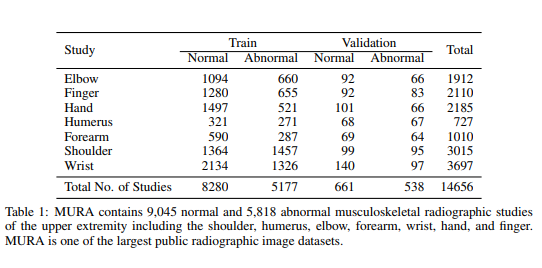

In [55]:
Image("MURA_Breakdown.PNG")

Replicate:

In [56]:
studies = images_summary.groupby(["DataRole", "Site", "PatientID", "StudyNumber", "StudyOutcome"], as_index=False).count()
studies.shape[0]

14656

In [57]:
studies_breakdown = studies.groupby(["DataRole", "Site", "StudyOutcome"], as_index=False).size()
studies_breakdown.unstack(level=0).unstack(level=1)

DataRole     train       valid    
StudyOutcome     0     1     0   1
Site                              
XR_ELBOW      1094   660    92  66
XR_FINGER     1280   655    92  83
XR_FOREARM     590   287    69  64
XR_HAND       1497   521   101  66
XR_HUMERUS     321   271    68  67
XR_SHOULDER   1364  1457    99  95
XR_WRIST      2134  1326   140  97

In [58]:
# Subtotals - by Site:
studies.groupby(["Site"], as_index=False).size()

Site
XR_ELBOW       1912
XR_FINGER      2110
XR_FOREARM     1010
XR_HAND        2185
XR_HUMERUS      727
XR_SHOULDER    3015
XR_WRIST       3697
dtype: int64

In [59]:
# Subtotals - by Role & Outcome
studies.groupby(["DataRole", "StudyOutcome"], as_index=False).size()

DataRole  StudyOutcome
train     0               8280
          1               5177
valid     0                661
          1                538
dtype: int64

In [60]:
import numpy as np

In [61]:
studies_breakdown_df = studies.groupby(["DataRole", "Site", "StudyOutcome"], as_index=False).count()
table = pd.pivot_table(studies_breakdown_df, values=['ImageNumber'],
                       index=['Site'],
                       columns=['DataRole', 'StudyOutcome'],
                       fill_value=0, aggfunc=np.sum, dropna=True, )
print(table)

             ImageNumber                
DataRole           train       valid    
StudyOutcome           0     1     0   1
Site                                    
XR_ELBOW            1094   660    92  66
XR_FINGER           1280   655    92  83
XR_FOREARM           590   287    69  64
XR_HAND             1497   521   101  66
XR_HUMERUS           321   271    68  67
XR_SHOULDER         1364  1457    99  95
XR_WRIST            2134  1326   140  97


### Image Resolutions

Examine the resolutions and aspect rations of the images; want to retain a similar apsect ratio when resizing

ImageHeight
512    31634
406     2009
420      638
379      424
425      346
407      286
424      197
405      130
412      127
411      124
dtype: int64

ImageWidth
512    9368
406    6366
407    1901
379    1895
420    1620
405    1130
424     810
425     411
409     250
408     243
dtype: int64



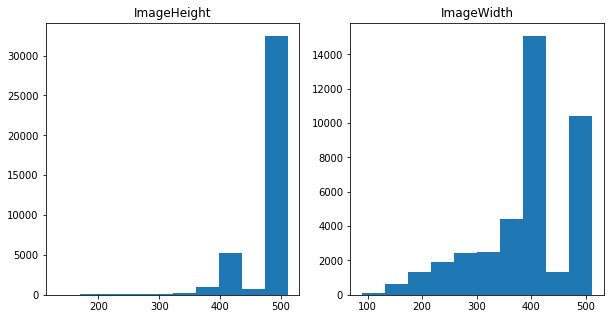

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
i=0
for col in ["ImageHeight","ImageWidth"]:

    axes[i].hist(images_summary[col])
    axes[i].set_title(col)
    i+=1
    
    print(images_summary.groupby(col, as_index=False).size().nlargest(10))
    print()

Note: The most common individual width is 512, but the histogram bin around 400 will include 406 & 407 & 405 etc and so outweighing 512 in isolation (and its neighbours).

/home/harrisoneighty7_gmail_com/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/harrisoneighty7_gmail_com/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/harrisoneighty7_gmail_com/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


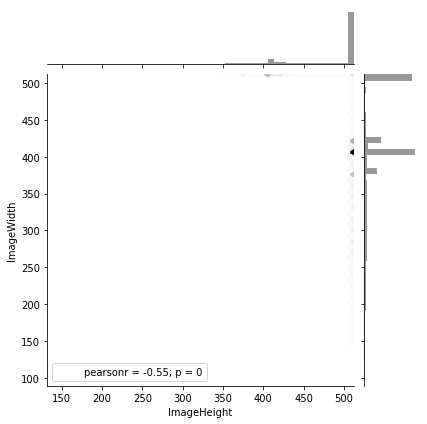

In [63]:
sns.jointplot(x="ImageHeight", y="ImageWidth", data=images_summary, kind="hex", color="k")

The above joint plot shows the highest density at (512,406)

In [64]:
512/406

1.2610837438423645

#### Aspect Ratio

In [65]:
aspect_ratio = images_summary.ImageHeight/images_summary.ImageWidth

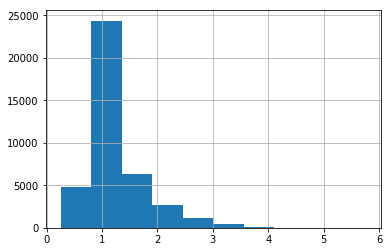

In [66]:
aspect_ratio.hist()

In [67]:
aspect_ratio.round(1).value_counts()

1.3    11478
0.8     5399
1.2     4732
1.4     3267
1.0     2162
1.5     1404
1.1     1133
1.6     1132
1.7     1061
0.9     1014
1.8      935
0.7      909
1.9      775
2.0      665
2.1      534
2.2      462
2.3      403
2.4      326
2.5      280
2.6      219
2.7      213
0.6      199
2.8      198
2.9      144
3.0      142
0.4      125
3.1       97
0.5       84
3.2       81
3.3       76
3.5       66
3.4       51
0.3       45
3.6       37
3.9       31
3.8       31
3.7       26
4.0       14
4.1       14
4.3        8
4.2        7
4.5        7
4.4        6
4.7        4
4.6        3
5.0        2
4.9        1
5.8        1
5.3        1
4.8        1
dtype: int64

In [68]:
aspect_ratio.round(1).value_counts()/images_summary.shape[0]

1.3    0.286914
0.8    0.134958
1.2    0.118285
1.4    0.081665
1.0    0.054043
1.5    0.035096
1.1    0.028321
1.6    0.028296
1.7    0.026522
0.9    0.025347
1.8    0.023372
0.7    0.022722
1.9    0.019373
2.0    0.016623
2.1    0.013348
2.2    0.011549
2.3    0.010074
2.4    0.008149
2.5    0.006999
2.6    0.005474
2.7    0.005324
0.6    0.004974
2.8    0.004949
2.9    0.003600
3.0    0.003550
0.4    0.003125
3.1    0.002425
0.5    0.002100
3.2    0.002025
3.3    0.001900
3.5    0.001650
3.4    0.001275
0.3    0.001125
3.6    0.000925
3.9    0.000775
3.8    0.000775
3.7    0.000650
4.0    0.000350
4.1    0.000350
4.3    0.000200
4.2    0.000175
4.5    0.000175
4.4    0.000150
4.7    0.000100
4.6    0.000075
5.0    0.000050
4.9    0.000025
5.8    0.000025
5.3    0.000025
4.8    0.000025
dtype: float64

In [69]:
sum(images_summary.DataRole=="train"), sum(images_summary.DataRole=="valid")

(36808, 3197)

In [70]:
images_summary[images_summary.DataRole=="train"].FileName_Relative.shape, images_summary[images_summary.DataRole=="valid"].FileName_Relative.shape

((36808,), (3197,))

In [71]:
images_summary[images_summary.DataRole=="train"].StudyOutcome

3197     1
3198     1
3199     1
3200     1
3201     1
3202     1
3203     1
3204     0
3205     0
3206     0
3207     0
3208     0
3209     0
3210     0
3211     0
3212     1
3213     1
3214     1
3215     1
3216     1
3217     1
3218     1
3219     1
3220     1
3221     1
3222     1
3223     0
3224     0
3225     0
3226     0
        ..
39975    1
39976    1
39977    1
39978    0
39979    0
39980    0
39981    0
39982    0
39983    1
39984    1
39985    0
39986    0
39987    1
39988    1
39989    0
39990    0
39991    0
39992    0
39993    0
39994    0
39995    0
39996    0
39997    0
39998    0
39999    0
40000    0
40001    0
40002    0
40003    0
40004    0
Name: StudyOutcome, Length: 36808, dtype: int64

In [72]:
xx = images_summary[images_summary.DataRole=="train"].FileName_Relative.values
xx = "/dir/"+xx
type(xx)

numpy.ndarray

In [73]:
num_images_train=sum(images_summary.DataRole=="train")
num_images_train

36808

In [74]:
num_images_train/32

1150.25

In [75]:
num_images_valid=sum(images_summary.DataRole=="valid")
num_images_valid

3197

In [76]:
num_images_valid/32

99.90625

#### Outcome by Site

In [77]:
studies.head()

,DataRole,Site,PatientID,StudyNumber,StudyOutcome,Unnamed: 0,ImageNumber,ImageWidth,ImageHeight,FileName,FileName_Relative,Img_Path_MURA,Study_Path_MURA
0,train,XR_ELBOW,patient00011,study1,0,3,3,3,3,3,3,3,3
1,train,XR_ELBOW,patient00016,study1,1,3,3,3,3,3,3,3,3
2,train,XR_ELBOW,patient00026,study1,0,3,3,3,3,3,3,3,3
3,train,XR_ELBOW,patient00031,study1,0,2,2,2,2,2,2,2,2
4,train,XR_ELBOW,patient00034,study1,1,4,4,4,4,4,4,4,4


In [78]:
outcomes_breakdown_df = studies.groupby(["DataRole", "Site", "StudyOutcome"], as_index=False).count()
table = pd.pivot_table(studies_breakdown_df, values=['ImageNumber'],
                       index=['Site'],
                       columns=['DataRole', 'StudyOutcome'],
                       fill_value=0, aggfunc=np.sum, dropna=True, )
print(table)

             ImageNumber                
DataRole           train       valid    
StudyOutcome           0     1     0   1
Site                                    
XR_ELBOW            1094   660    92  66
XR_FINGER           1280   655    92  83
XR_FOREARM           590   287    69  64
XR_HAND             1497   521   101  66
XR_HUMERUS           321   271    68  67
XR_SHOULDER         1364  1457    99  95
XR_WRIST            2134  1326   140  97


In [79]:
from tensorflow.python.keras.utils import to_categorical

In [80]:
labels = images_summary.StudyOutcome.values
labels[:20]

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [81]:
labels_cat = to_categorical(labels)
labels_cat[:20,:]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [82]:
np.sum(labels_cat[images_summary.DataRole=="train",0])

21935.0

In [83]:
positive_train = sum(images_summary[images_summary.DataRole=="train"].StudyOutcome.values)

In [84]:
labels_train = images_summary[images_summary.DataRole=="train"].StudyOutcome.values
labels_train = to_categorical(labels_train)
num_classes = labels_train.shape[1]

labels_valid = images_summary[images_summary.DataRole=="valid"].StudyOutcome.values
labels_valid = to_categorical(labels_valid)

# Check to_categorical working as intended (e.g. not differently for train vs valid, 0->[1,0], 1->[0,1])
labels_dict = {"train":labels_train, "valid":labels_valid}

In [85]:
labels_dict

{'train': array([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32), 'valid': array([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [1., 0.],
        [1., 0.]], dtype=float32)}

In [86]:
role="train"

In [87]:
np.sum(labels_dict[role],axis=0)[1]

14873.0

In [88]:
for role in ['train','valid']:
    for x in range(2):
        num_outcomes = sum(images_summary[images_summary.DataRole==role].StudyOutcome.values==x)
        num_outcomes_categorical = np.sum(labels_dict[role],axis=0)[x]
        print(num_outcomes)
        print(num_outcomes_categorical)
        print()

21935
21935.0

14873
14873.0

1667
1667.0

1530
1530.0



In [89]:
import math

In [90]:
math.ceil(images_summary[images_summary["DataRole"]=="train"].count()[0]/32)

1151

In [91]:
images_summary[images_summary["DataRole"]=="train"].count()[0]/3

12269.333333333334

In [92]:
math.ceil(images_summary[images_summary["DataRole"]=="train"].count()[0]/3)

12270

In [93]:
x = np.array([[0,1],[1,0],[1,0],[1,0]])
x

array([[0, 1],
       [1, 0],
       [1, 0],
       [1, 0]])

In [94]:
y = np.array([[1,0],[1,0],[1,0],[1,0]])
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [95]:
xy = x*y
xy

array([[0, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [96]:
np.sum(xy)/x.shape[0]

0.75

In [97]:
np.argmax(x, axis=1)

array([1, 0, 0, 0])

In [98]:
from sklearn.metrics import confusion_matrix

/home/harrisoneighty7_gmail_com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/harrisoneighty7_gmail_com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [99]:
cm = confusion_matrix(images_summary[images_summary.DataRole=="train"].StudyOutcome,images_summary[images_summary.DataRole=="train"].StudyOutcome)
print(cm)

[[21935     0]
 [    0 14873]]


In [100]:
sum(images_summary[images_summary.DataRole=="valid"].StudyOutcome==1)

1530

In [101]:
(cm[0,0]+cm[1,1])/sum(cm)

array([1.67804878, 2.47482014])

In [102]:
import tensorflow as tf

In [114]:
a = np.random.rand(len(images_summary))

In [115]:
images_summary["TEST"] = a

In [116]:
images_summary.head()

,Unnamed: 0,DataRole,Site,PatientID,StudyNumber,StudyOutcome,ImageNumber,ImageWidth,ImageHeight,FileName,FileName_Relative,Img_Path_MURA,Study_Path_MURA,TEST
0,0,valid,XR_ELBOW,patient11236,study1,1,image2,406,512,/home/harrisoneighty7_gmail_com/MURA/data/raw/...,MURA-v1.1/valid/XR_ELBOW/patient11236/study1_p...,ta/raw/MURA-v1.1/valid/XR_ELBOW/patient11236/s...,ta/raw/MURA-v1.1/valid/XR_ELBOW/patient11236/s...,0.818738
1,1,valid,XR_ELBOW,patient11236,study1,1,image3,424,512,/home/harrisoneighty7_gmail_com/MURA/data/raw/...,MURA-v1.1/valid/XR_ELBOW/patient11236/study1_p...,ta/raw/MURA-v1.1/valid/XR_ELBOW/patient11236/s...,ta/raw/MURA-v1.1/valid/XR_ELBOW/patient11236/s...,0.422973
2,2,valid,XR_ELBOW,patient11236,study1,1,image1,512,424,/home/harrisoneighty7_gmail_com/MURA/data/raw/...,MURA-v1.1/valid/XR_ELBOW/patient11236/study1_p...,ta/raw/MURA-v1.1/valid/XR_ELBOW/patient11236/s...,ta/raw/MURA-v1.1/valid/XR_ELBOW/patient11236/s...,0.422436
3,3,valid,XR_ELBOW,patient11342,study1,1,image2,512,407,/home/harrisoneighty7_gmail_com/MURA/data/raw/...,MURA-v1.1/valid/XR_ELBOW/patient11342/study1_p...,ta/raw/MURA-v1.1/valid/XR_ELBOW/patient11342/s...,ta/raw/MURA-v1.1/valid/XR_ELBOW/patient11342/s...,0.381379
4,4,valid,XR_ELBOW,patient11342,study1,1,image1,407,512,/home/harrisoneighty7_gmail_com/MURA/data/raw/...,MURA-v1.1/valid/XR_ELBOW/patient11342/study1_p...,ta/raw/MURA-v1.1/valid/XR_ELBOW/patient11342/s...,ta/raw/MURA-v1.1/valid/XR_ELBOW/patient11342/s...,0.736871


In [117]:
b = images_summary.groupby(["Site", "PatientID", "StudyNumber"], as_index=False).agg({"TEST":"mean"})

In [118]:
print(len(b))
print(b.head())


14656
       Site     PatientID StudyNumber      TEST
0  XR_ELBOW  patient00011      study1  0.403370
1  XR_ELBOW  patient00016      study1  0.553621
2  XR_ELBOW  patient00026      study1  0.477427
3  XR_ELBOW  patient00031      study1  0.596486
4  XR_ELBOW  patient00034      study1  0.414265


In [126]:
PredLabel = np.zeros(len(b))

In [128]:
PredLabel[b["TEST"]>0.5] = 1

In [130]:
np.sum(PredLabel)

7313.0

In [131]:
a = {"a": {"aa":1, "ab":2}, "b": {"ba":3, "bb":4}}

In [140]:
b = {"a": {"ca":1, "ab":2}, "b": {"ba":3, "bb":4}}

In [142]:
a!=b

True